In [1]:
import sys
!"{sys.executable}" -m pip install tensorflow


In [2]:
### Data Collection
import pandas_datareader as pdr
key=""


In [4]:
import yfinance as yf

df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
df.to_csv('AAPL.csv')
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400
2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146927  72.753808  71.926900  72.497514  108872000
2020-01-08  73.307518  73.609752  71.849540  71.849540  132079200


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500


In [6]:
df1=df.reset_index()['Close']


In [7]:
df1

Ticker,AAPL
0,72.620842
1,71.914810
2,72.487854
3,72.146927
4,73.307518
...,...
1252,254.655716
1253,257.578674
1254,258.396667
1255,254.974930


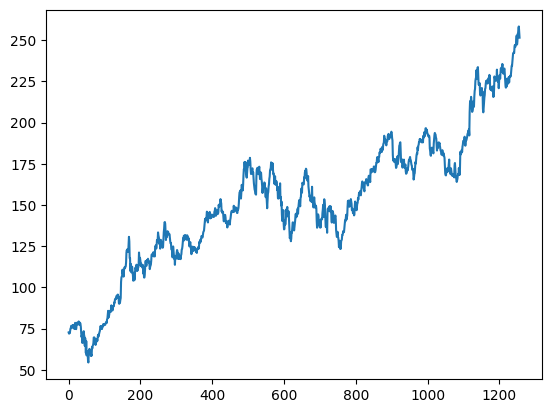

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
## LSTM 


In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.08941492]
 [0.08595428]
 [0.08876307]
 ...
 [1.        ]
 [0.98322826]
 [0.96665203]]


In [13]:
# splitting dataset into train and test split 
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size


(817, 440)

In [15]:
train_data

array([[0.08941492],
       [0.08595428],
       [0.08876307],
       [0.08709201],
       [0.09278068],
       [0.10041295],
       [0.10124242],
       [0.10909981],
       [0.1040275 ],
       [0.10243942],
       [0.10706138],
       [0.11119749],
       [0.10863764],
       [0.10997685],
       [0.11179017],
       [0.11069975],
       [0.09960703],
       [0.10996504],
       [0.1178461 ],
       [0.11728913],
       [0.10027062],
       [0.09926337],
       [0.11133963],
       [0.11442118],
       [0.11887718],
       [0.11363838],
       [0.11544399],
       [0.11313944],
       [0.12215588],
       [0.119388  ],
       [0.11948302],
       [0.11241479],
       [0.11790313],
       [0.11395912],
       [0.10534652],
       [0.08768181],
       [0.07568367],
       [0.08111259],
       [0.05838724],
       [0.05819715],
       [0.08843025],
       [0.07715669],
       [0.0930988 ],
       [0.08143333],
       [0.07681216],
       [0.04965591],
       [0.0724286 ],
       [0.060

In [16]:
test_data


array([[0.53260586],
       [0.53876067],
       [0.53614379],
       [0.52708125],
       [0.53144286],
       [0.51869721],
       [0.51273642],
       [0.50934403],
       [0.53580446],
       [0.53410835],
       [0.5342052 ],
       [0.54021454],
       [0.54583615],
       [0.54108683],
       [0.53318759],
       [0.53468992],
       [0.52712979],
       [0.52708125],
       [0.54961618],
       [0.55577091],
       [0.55533473],
       [0.55024623],
       [0.54496371],
       [0.53691908],
       [0.57462282],
       [0.57428349],
       [0.56589961],
       [0.57457436],
       [0.57549511],
       [0.57093329],
       [0.56850691],
       [0.56850691],
       [0.57151569],
       [0.58296856],
       [0.58350243],
       [0.57884367],
       [0.56603184],
       [0.56739072],
       [0.57297158],
       [0.58481277],
       [0.5938878 ],
       [0.59364503],
       [0.60742743],
       [0.61160094],
       [0.60495259],
       [0.60315685],
       [0.59641134],
       [0.609

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)


(339, 100)
(339,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\soumy\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0852 - val_loss: 0.0374
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0041 - val_loss: 0.0352
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0026 - val_loss: 0.0131
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0019 - val_loss: 0.0112
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0017 - val_loss: 0.0102
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0014 - val_loss: 0.0075
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step

In [27]:
import tensorflow as tf


In [28]:
tf.__version__


'2.19.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

136.28169978498642

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

193.81746356688743

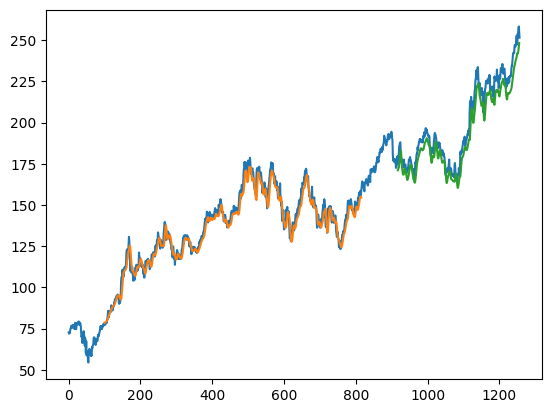

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)


440

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.7884342536403337,
 0.795956169797841,
 0.8142236590971146,
 0.8164216274385698,
 0.8310746749235824,
 0.837570902438286,
 0.8367894075696367,
 0.8398176347432171,
 0.8392804084400773,
 0.8301466637904404,
 0.8414294632353465,
 0.843090205273662,
 0.8472418733910627,
 0.8397199572335552,
 0.8558383169462047,
 0.8519797561491442,
 0.8215501454439436,
 0.8121722818115071,
 0.8196452844228286,
 0.8120256907556596,
 0.8124653143404925,
 0.8085577652058911,
 0.8210129191408038,
 0.8215501454439436,
 0.8202314242721545,
 0.7900461569238182,
 0.79234172798358,
 0.8113907121515029,
 0.8513447027536325,
 0.8480722070145428,
 0.8396223545152486,
 0.8440182164068037,
 0.8391338173842295,
 0.8447508725206221,
 0.8460696684837663,
 0.871517202656731,
 0.8383523973069353,
 0.8411364307063611,
 0.8357147305892922,
 0.841234183007378,
 0.8162751111740771,
 0.8362032677203111,
 0.8546172732840773,
 0.8521751111684679,
 0.8448973887851148,
 0.8632137916305744,
 0.8756688707741318,
 0.8655582014451673,

In [39]:
if len(temp_input) < n_steps:
    # pad with zeros or replicate last value to make length 100
    temp_input = temp_input + [temp_input[-1]] * (n_steps - len(temp_input))


In [40]:
temp_input

[0.7884342536403337,
 0.795956169797841,
 0.8142236590971146,
 0.8164216274385698,
 0.8310746749235824,
 0.837570902438286,
 0.8367894075696367,
 0.8398176347432171,
 0.8392804084400773,
 0.8301466637904404,
 0.8414294632353465,
 0.843090205273662,
 0.8472418733910627,
 0.8397199572335552,
 0.8558383169462047,
 0.8519797561491442,
 0.8215501454439436,
 0.8121722818115071,
 0.8196452844228286,
 0.8120256907556596,
 0.8124653143404925,
 0.8085577652058911,
 0.8210129191408038,
 0.8215501454439436,
 0.8202314242721545,
 0.7900461569238182,
 0.79234172798358,
 0.8113907121515029,
 0.8513447027536325,
 0.8480722070145428,
 0.8396223545152486,
 0.8440182164068037,
 0.8391338173842295,
 0.8447508725206221,
 0.8460696684837663,
 0.871517202656731,
 0.8383523973069353,
 0.8411364307063611,
 0.8357147305892922,
 0.841234183007378,
 0.8162751111740771,
 0.8362032677203111,
 0.8546172732840773,
 0.8521751111684679,
 0.8448973887851148,
 0.8632137916305744,
 0.8756688707741318,
 0.8655582014451673,

In [41]:
len(temp_input)

100

In [45]:
from numpy import array
import numpy as np

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        # Use the last 100 elements exactly
        x_input = np.array(temp_input[-n_steps:])
    else:
        # If less than 100, pad with last value to make length 100
        x_input = np.array(temp_input)
        last_value = x_input[-1]
        x_input = np.append(x_input, [last_value] * (n_steps - len(x_input)))
    
    print(f"{i} day input {x_input}")
    
    # reshape input to (1, 100, 1)
    x_input = x_input.reshape((1, n_steps, 1))
    
    # predict next value
    yhat = model.predict(x_input, verbose=0)
    print(f"{i} day output {yhat}")
    
    # append prediction to temp_input for next iteration
    temp_input.extend(yhat[0].tolist())
    # remove first element to keep rolling window size consistent
    if len(temp_input) > n_steps:
        temp_input = temp_input[1:]
    
    lst_output.extend(yhat.tolist())
    i += 1

print(lst_output)


0 day input [0.81783803 0.82487155 0.82130595 0.84455544 0.8432353  0.82988632
 0.82988632 0.83423812 0.84939631 0.83365139 0.84841834 0.84968972
 0.8532103  0.85086327 0.85746436 0.87213356 0.88284203 0.88220638
 0.89394175 0.90499254 0.91995515 0.92171544 0.92186211 0.92088413
 0.94000305 0.94499058 0.93873174 0.94591964 0.94675087 0.96098
 0.97291087 0.94635971 0.95486783 0.97784964 0.98166363 0.99599059
 1.         0.98322826 0.96665203 0.96665203 0.93833554 0.92369699
 0.90646547 0.88858241 0.87093329 0.85378134 0.83712697 0.82087326
 0.80489302 0.78905332 0.77323169 0.75732857 0.74127609 0.72504121
 0.7086283  0.6920737  0.67544311 0.65882307 0.64231586 0.62603098
 0.61007965 0.59456754 0.57959068 0.56523001 0.55155009 0.53859603
 0.52639431 0.5149532  0.50426471 0.49430749 0.48504934 0.47645056
 0.46846712 0.46105254 0.45416    0.44774479 0.4417645  0.43617988
 0.43095523 0.42605865 0.42146158 0.41713852 0.41306692 0.40922651
 0.40559876 0.40216744 0.39891729 0.39583418 0.392905

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [47]:
import matplotlib.pyplot as plt


In [48]:
len(df1)


1257

In [50]:
import numpy as np

lst_output_np = np.array(lst_output).reshape(-1, 1)


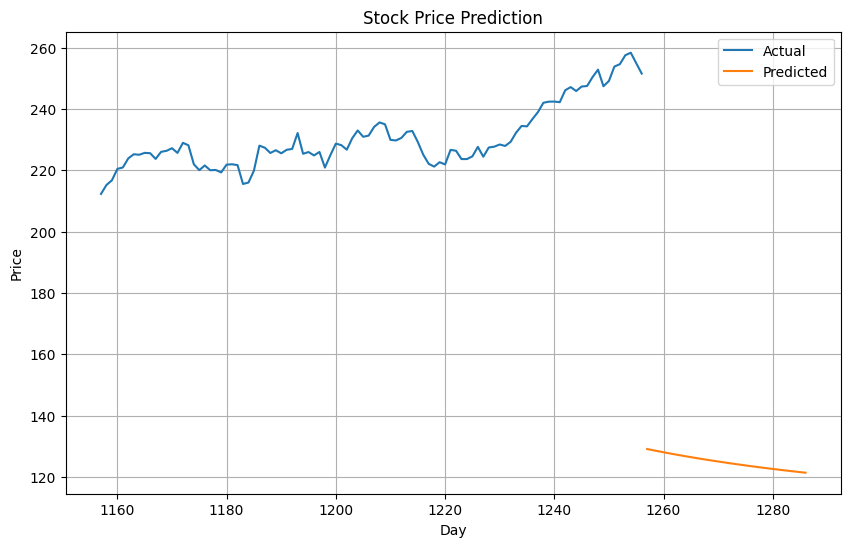

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Create day_new: for plotting last 100 actual days
day_new = np.arange(len(df1) - 100, len(df1))  # from 1157 to 1256

# Prepare the corresponding y values (actual prices)
actual_prices = scaler.inverse_transform(df1[len(df1) - 100:])  # shape (100, 1)

# Create day_pred: the next 30 days
day_pred = np.arange(len(df1), len(df1) + 30)  # from 1257 to 1286

# Convert predictions to numpy and reshape for plotting
lst_output_np = np.array(lst_output)
predicted_prices = scaler.inverse_transform(lst_output_np).flatten()

# Flatten actual prices for plotting
actual_prices = actual_prices.flatten()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(day_new, actual_prices, label="Actual")
plt.plot(day_pred, predicted_prices, label="Predicted")
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
day_new = np.arange(1158, 1158 + len(df1[1158:]))  # Should be 99 elements


In [54]:
y_actual = scaler.inverse_transform(df1[1158:]).flatten()


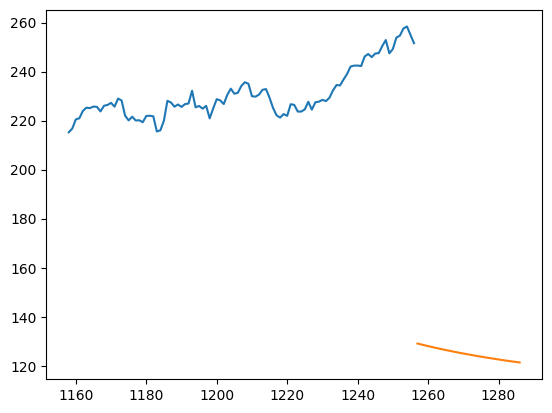

In [55]:
plt.plot(day_new, y_actual)
plt.plot(day_pred, scaler.inverse_transform(lst_output_np).flatten())


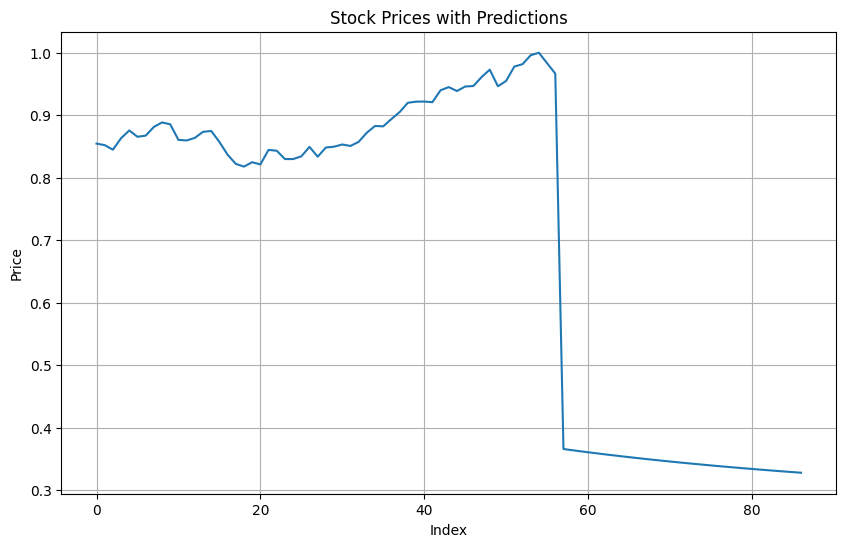

In [57]:
# Flatten df1 if it's (1257,1) shape
df3 = df1.flatten().tolist()

# Flatten lst_output if it's [[val], [val], ...]
lst_output_flat = [item[0] if isinstance(item, list) else item for item in lst_output]

# Extend the actual list with predictions
df3.extend(lst_output_flat)

# Plot the tail (e.g., from index 1200)
plt.figure(figsize=(10, 6))
plt.plot(df3[1200:])
plt.title("Stock Prices with Predictions")
plt.xlabel("Index")
plt.ylabel("Price")
plt.grid(True)
plt.show()


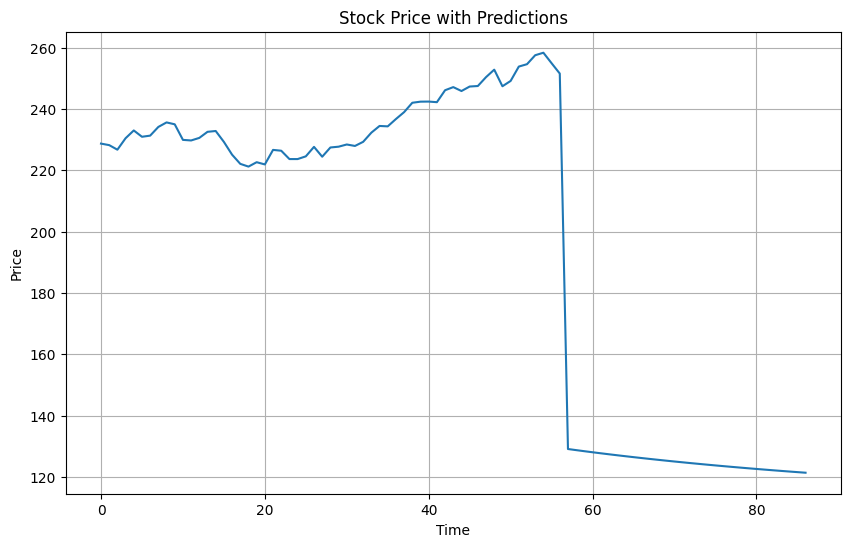

In [59]:
# Assuming df1 is a scaled array of shape (1257, 1)
df3 = df1.flatten().tolist()  # Convert to 1D list

# Flatten lst_output if needed
lst_output_flat = [item[0] if isinstance(item, list) else item for item in lst_output]

# Extend with predictions
df3.extend(lst_output_flat)

# Inverse transform (rescale back to original price values)
df3 = np.array(df3).reshape(-1, 1)
df3 = scaler.inverse_transform(df3).tolist()

# Optional: Flatten back for plotting
df3 = [item[0] for item in df3]

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(df3[1200:])
plt.title("Stock Price with Predictions")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()


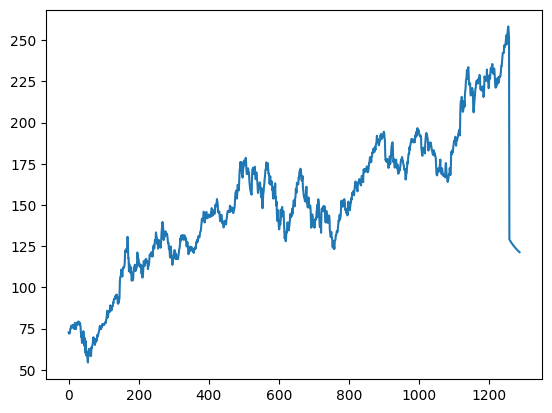

In [60]:

plt.plot(df3)
